# Linear-Regression Model Exploration (CSC311 Machine Learning Project)

## Introduction

In this notebook, we will explore the linear regression model, using the `sklearn` library.
The goal of this exploration is to determine the optimal hyperparameters for our model, and to evaluate the model's performance on the class provided dataset.

## Data Splitting

For this model I decided to do 5 different splits on the data
 1. 60% Training, 20% Testing, 20% Validation
 2. 70% Training, 15% Testing, 15% Validation
 3. 80% Training, 10% Testing, 10% Validation
 4. 90% Training, 5% Testing, 5% Validation
 5. 95% Training, 2.5% Testing, 2.5% Validation

Reasoning: it became apparent that having the largest subset of the data devoted just for training was necessary. However it might pose an interesting challenge optimizing this too.

Then, having _N = 1440_ data points, that gives us:
```
    n_train, n_test, n_valid = 0.6 * N, 0.2 * N, 0.2 * N # For split 1
    n_train, n_test, n_valid = 0.7 * N, 0.15 * N, 0.15 * N # For split 2
    # etc. 
```

The data is split in the following way (this is implemented in `/model/encoding.py` in `data_split()`:
- `x_test, y_test = x[:n_train], y[:n_train]`
- `x_train, y_train = x[n_train:n_train + n_test], y[n_train:n_train + n_test]`
- `x_valid, y_valid = x[n_train + n_test:], y[n_train + n_test]`

# Process
The code below splits the data on various splits, trains a linear regression model with each, and graphs MSE, and accuracies - `linreg.score` ($R^2$) - against the split ratios.

In [1]:
import sys
sys.path.append('../../') # Path to root directory

from model.encoding import encode, split_data
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

FILE_NAME = "clean_dataset.csv"
FILE_PATH = "../../model/"

# Encode the data
X, t = encode(FILE_PATH + FILE_NAME)
print("Number of data points: " + str(X.shape[0]))

Number of data points: 1468


In [2]:
def process(splits=[(0.7, 0.15), (0.8, 0.1), (0.9, 0.05), (0.95, 0.025)]):
    MSEs = []
    ACCs = []
    for split in splits:
        # Split the data
        print("\tSplit:", split)
        X_train, t_train, X_test, t_test, X_valid, t_valid = split_data(X, t, split[0], split[1])
        
        # Print in a nice format
        print(f"Training data: {X_train.shape[0]} samples")
        print(f"Testing data: {X_test.shape[0]} samples")
        print(f"Validation data: {X_valid.shape[0]} samples")
        
        # Fit, train and test
        linreg = LR(fit_intercept = False)
        linreg.fit(X_train, t_train)
        
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)
        y_valid_pred = linreg.predict(X_valid)
        
        # Calculate mse for training and testing predicions
        train_mse = mse(t_train, y_train_pred)
        test_mse = mse(t_test, y_test_pred)
        valid_mse = mse(t_valid, y_valid_pred)

        train_acc = linreg.score(X_train, t_train)
        test_acc = linreg.score(X_test, t_test)
        valid_acc = linreg.score(X_valid, t_valid)
        
        # print(linreg.coef_) # weights
        # print("\tTraining MSE:", train_mse, "\t Training Acc:", linreg.score(X_train, t_train))
        # print("\tTesting MSE:", test_mse, "\t Testing Acc:", linreg.score(X_test, t_test))
        # print("\tValidation MSE:", valid_mse, "\t Validation Acc:", linreg.score(X_valid, t_valid))
        MSEs.append((train_mse, test_mse, valid_mse))
        ACCs.append((train_acc, test_acc, valid_acc))

    return MSEs, ACCs

	Split: (0.7, 0.15)
Training data: 1027 samples
Testing data: 220 samples
Validation data: 221 samples
	Split: (0.75, 0.125)
Training data: 1101 samples
Testing data: 183 samples
Validation data: 184 samples
	Split: (0.8, 0.1)
Training data: 1174 samples
Testing data: 146 samples
Validation data: 148 samples
	Split: (0.85, 0.075)
Training data: 1247 samples
Testing data: 110 samples
Validation data: 111 samples
	Split: (0.9, 0.05)
Training data: 1321 samples
Testing data: 73 samples
Validation data: 74 samples
	Split: (0.95, 0.025)
Training data: 1394 samples
Testing data: 36 samples
Validation data: 38 samples


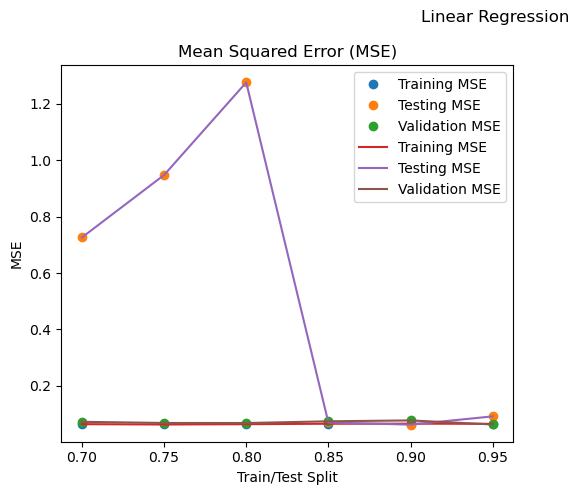

In [8]:
import matplotlib.pyplot as plt

def plot_results(splits, MSEs, ACCs, title, ideal_alphas=None):
    # Extract MSEs and ACCs for each split
    train_mses = [mse[0] for mse in MSEs]
    test_mses = [mse[1] for mse in MSEs]
    valid_mses = [mse[2] for mse in MSEs]
    
    train_accs = [acc[0] for acc in ACCs]
    test_accs = [acc[1] for acc in ACCs]
    valid_accs = [acc[2] for acc in ACCs]

    # Plot MSEs
    
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(splits, train_mses, 'o', label='Training MSE')
    plt.plot(splits, test_mses, 'o', label='Testing MSE')
    plt.plot(splits, valid_mses, 'o', label='Validation MSE')
    plt.plot(splits, train_mses, label='Training MSE')
    plt.plot(splits, test_mses, label='Testing MSE')
    plt.plot(splits, valid_mses, label='Validation MSE')
    plt.title('Mean Squared Error (MSE)')
    plt.xlabel('Train/Test Split')
    plt.ylabel('MSE')
    plt.legend()

    # Plot ideal alphas
    if ideal_alphas is not None:
        plt.subplot(1, 2, 2)
        plt.plot(splits, ideal_alphas, 'x', label="Ideal Alphas")
        plt.title('Ideal Alphas')
        plt.xlabel('Train/Test Split')
        plt.ylabel('alpha')
        plt.legend()

    # Plot Accuracies
    # plt.subplot(1, 2, 2)
    # plt.plot(splits, train_accs, label='Training Acc')
    # plt.plot(splits, test_accs, label='Testing Acc')
    # plt.plot(splits, valid_accs, label='Validation Acc')
    # plt.title('Accuracy')
    # plt.xlabel('Train/Test Split')
    # plt.ylabel('Accuracy')
    # plt.legend()

    plt.suptitle(title)
    
    plt.tight_layout()
    plt.show()

splits=[(0.7, 0.15), (0.75, 0.125), (0.8, 0.1), (0.85, 0.075), (0.9, 0.05), (0.95, 0.025)]
MSEs, ACCs = process(splits=splits)
splits = [split[0] for split in splits]

# Plot results
plot_results(splits, MSEs, ACCs, title="Linear Regression")

## Regularization
The graphs above show the results of `process()` _before_ applying regularization techniques.
The rest of this notebook will be the exploration of Lasso Regularization and Ridge Regularization.

#### Ridge Regularization
 - Adds a penalty term to the linear regression objecive function that penalizes large coefficient values.
 - This penalty is proportional to the square of the magnitude of the coefficients

$$
    \text{Ridge Term} = \alpha \sum_{j=1}^p \beta_j^2
$$
    (where $\alpha$ is the regularization parameter and $\beta_j$ are the regression coefficients)
    
 - Usually shrinks coefficients towards zero without setting them exactly to zero.
#### Lasso Regularization
 - Adds a penalty yerm to the linear regression objectvie function that penalizes the _absolute_ values of the coefficients.
 - This penalty term is proportional to the sum of the _absolute_ values of the coefficients.

$$
    \text{Lasso Term} = \alpha \sum_{j=1}^p | \beta_j |
$$

 - Shrinks some coefficients all the way to zero, in essence performing feature selection by removing irrelevent features from the model.

Luckily, the creators of `sklearn` have already implemented regularized linear regression models implementing both Lasso and Ridge regularization (the reason I selected them) enabling us to use them as a drop in replacement, in essence. Additionally, they each implement cross-validation to find the optimal choice of alpha among a set of alphas.

The code below demonstrates what was mentioned prior. Additionally, I focused the splits on the range $[0.8, 0.95]$ as they seemed to have lowest MSE values.

In [4]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import MultiTaskLassoCV as LassoCV

In [18]:
def process_ridge(splits=[(0.6, 0.2), (0.7, 0.15), (0.8, 0.1), (0.9, 0.05), (0.95, 0.025)], alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5):
    MSEs = []
    ACCs = []
    ideal_alphas = []
    for split in splits:
        # Split the data
        print("\tSplit:", split)
        X_train, t_train, X_test, t_test, X_valid, t_valid = split_data(X, t, split[0], split[1])
        
        # Print in a nice format
        print(f"Training data: {X_train.shape[0]} samples")
        print(f"Testing data: {X_test.shape[0]} samples")
        print(f"Validation data: {X_valid.shape[0]} samples")
        
        # Fit, train and test
        linreg = RidgeCV(fit_intercept = False, alphas=alphas, cv=cv)
        linreg.fit(X_train, t_train)
        
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)
        y_valid_pred = linreg.predict(X_valid)
        
        # Calculate mse for training and testing predicions
        train_mse = mse(t_train, y_train_pred)
        test_mse = mse(t_test, y_test_pred)
        valid_mse = mse(t_valid, y_valid_pred)

        train_acc = linreg.score(X_train, t_train)
        test_acc = linreg.score(X_test, t_test)
        valid_acc = linreg.score(X_valid, t_valid)
        
        # print(linreg.coef_) # weights
        # print("\tTraining MSE:", train_mse, "\t Training Acc:", linreg.score(X_train, t_train))
        # print("\tTesting MSE:", test_mse, "\t Testing Acc:", linreg.score(X_test, t_test))
        # print("\tValidation MSE:", valid_mse, "\t Validation Acc:", linreg.score(X_valid, t_valid))
        MSEs.append((train_mse, test_mse, valid_mse))
        ACCs.append((train_acc, test_acc, valid_acc))
        ideal_alphas.append(linreg.alpha_)
        print("Ideal Alpha for this split:", split, linreg.alpha_)
        print("MSE:", train_mse, test_mse, valid_mse)

    return MSEs, ACCs, ideal_alphas

def process_lasso(splits=[(0.6, 0.2), (0.7, 0.15), (0.8, 0.1), (0.9, 0.05), (0.95, 0.025)], alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5):
    MSEs = []
    ACCs = []
    ideal_alphas = []
    for split in splits:
        # Split the data
        print("\tSplit:", split)
        X_train, t_train, X_test, t_test, X_valid, t_valid = split_data(X, t, split[0], split[1])
        
        # Print in a nice format
        print(f"Training data: {X_train.shape[0]} samples")
        print(f"Testing data: {X_test.shape[0]} samples")
        print(f"Validation data: {X_valid.shape[0]} samples")
        
        # Fit, train and test
        linreg = LassoCV(fit_intercept = False, alphas=alphas, cv=cv)
        linreg.fit(X_train, t_train)
        
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)
        y_valid_pred = linreg.predict(X_valid)
        
        # Calculate mse for training and testing predicions
        train_mse = mse(t_train, y_train_pred)
        test_mse = mse(t_test, y_test_pred)
        valid_mse = mse(t_valid, y_valid_pred)

        train_acc = linreg.score(X_train, t_train)
        test_acc = linreg.score(X_test, t_test)
        valid_acc = linreg.score(X_valid, t_valid)
        
        # print(linreg.coef_) # weights
        # print("\tTraining MSE:", train_mse, "\t Training Acc:", linreg.score(X_train, t_train))
        # print("\tTesting MSE:", test_mse, "\t Testing Acc:", linreg.score(X_test, t_test))
        # print("\tValidation MSE:", valid_mse, "\t Validation Acc:", linreg.score(X_valid, t_valid))
        MSEs.append((train_mse, test_mse, valid_mse))
        ACCs.append((train_acc, test_acc, valid_acc))
        ideal_alphas.append(linreg.alpha_)
        print("Ideal Alpha for this split:", split, linreg.alpha_)
        print("MSE:", train_mse, test_mse, valid_mse)

    return MSEs, ACCs, ideal_alphas

	Split: (0.75, 0.125)
Training data: 1101 samples
Testing data: 183 samples
Validation data: 184 samples
Ideal Alpha for this split: (0.75, 0.125) 0.0028947368421052624
MSE: 0.06817751923852283 1.004291516153175 0.06549709119260844
	Split: (0.7605263157894737, 0.11973684210526314)
Training data: 1116 samples
Testing data: 175 samples
Validation data: 177 samples
Ideal Alpha for this split: (0.7605263157894737, 0.11973684210526314) 0.0028947368421052624
MSE: 0.06814951352535896 1.0666421001326447 0.06585498652631357
	Split: (0.7710526315789473, 0.11447368421052634)
Training data: 1131 samples
Testing data: 168 samples
Validation data: 169 samples
Ideal Alpha for this split: (0.7710526315789473, 0.11447368421052634) 0.0028947368421052624
MSE: 0.06834782698560006 1.1251949891429365 0.06512527989987583
	Split: (0.781578947368421, 0.10921052631578948)
Training data: 1147 samples
Testing data: 160 samples
Validation data: 161 samples
Ideal Alpha for this split: (0.781578947368421, 0.10921052

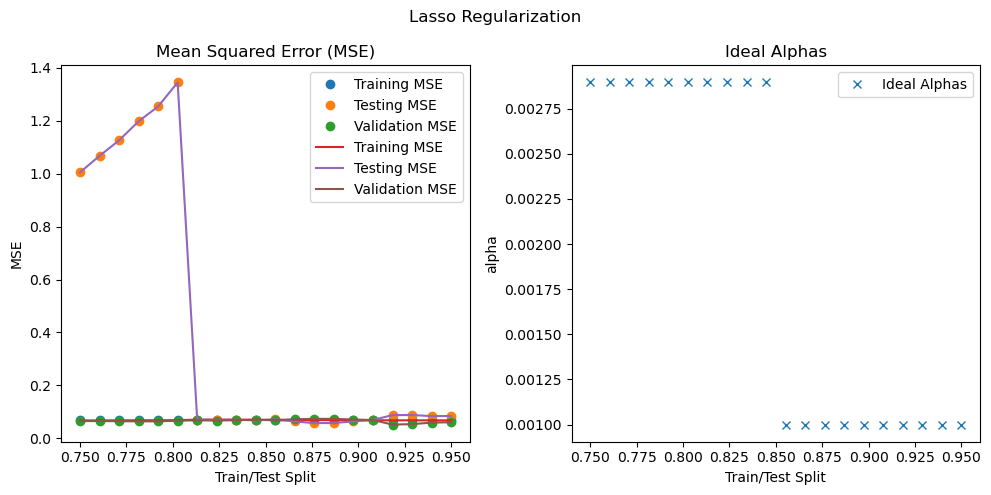

	Split: (0.75, 0.125)
Training data: 1101 samples
Testing data: 183 samples
Validation data: 184 samples
Ideal Alpha for this split: (0.75, 0.125) 0.01
MSE: 0.06300065916732402 0.9475609977867137 0.06835202954015085
	Split: (0.7605263157894737, 0.11973684210526314)
Training data: 1116 samples
Testing data: 175 samples
Validation data: 177 samples
Ideal Alpha for this split: (0.7605263157894737, 0.11973684210526314) 0.01
MSE: 0.0630004666787559 1.0101786372102737 0.06662257187851818
	Split: (0.7710526315789473, 0.11447368421052634)
Training data: 1131 samples
Testing data: 168 samples
Validation data: 169 samples
Ideal Alpha for this split: (0.7710526315789473, 0.11447368421052634) 0.01
MSE: 0.06303944893854314 1.0666803907636961 0.06584519028255034
	Split: (0.781578947368421, 0.10921052631578948)
Training data: 1147 samples
Testing data: 160 samples
Validation data: 161 samples
Ideal Alpha for this split: (0.781578947368421, 0.10921052631578948) 0.01
MSE: 0.06336477950785441 1.13257418

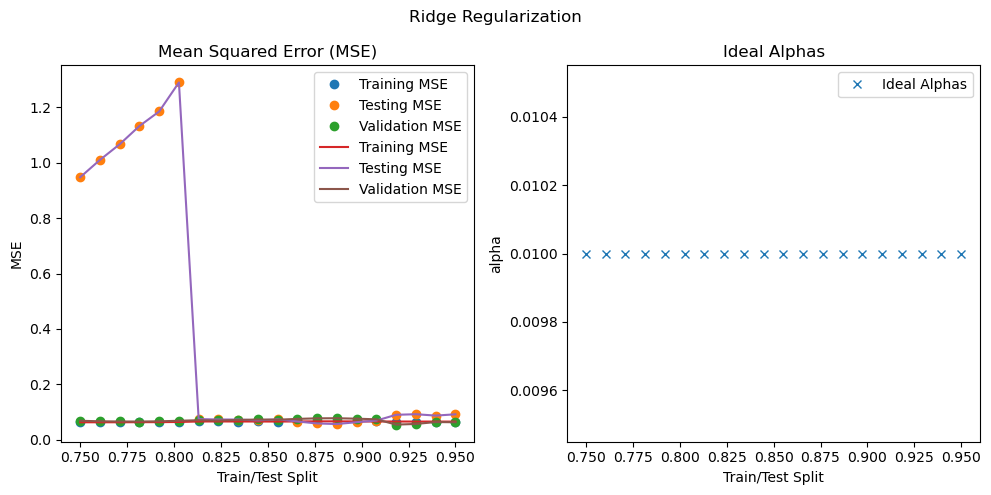

In [29]:
import numpy as np
# splits=[(0.8125, 0.09375), (0.825, 0.0875),  (0.85, 0.075), (0.9, 0.05), (0.95, 0.025)]
splits = [(x, (1 - x) / 2) for x in np.linspace(0.75, 0.95, num=20).tolist()]
alphas = np.linspace(0.01, 0.001, num=20).tolist()
MSEs, ACCs, ideal_alphas = process_lasso(splits=splits, alphas=alphas)
split_index = [split[0] for split in splits]

# Plot results
plot_results(split_index, MSEs, ACCs, title="Lasso Regularization", ideal_alphas=ideal_alphas)

MSEs, ACCs, ideal_alphas = process_ridge(splits=splits, alphas=alphas)
# Plot results
plot_results(split_index, MSEs, ACCs, title="Ridge Regularization", ideal_alphas=ideal_alphas)